In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("amazon-products.csv")
df = df[df['title'].notnull() & df['description'].notnull()].copy()
df["text"] = df["title"] + ". " + df["description"]


In [4]:
print(df.shape)



(998, 56)


In [5]:
print(df.columns)


Index(['timestamp', 'title', 'seller_name', 'brand', 'description',
       'initial_price', 'final_price', 'currency', 'availability',
       'reviews_count', 'categories', 'asin', 'buybox_seller',
       'number_of_sellers', 'root_bs_rank', 'answered_questions', 'domain',
       'images_count', 'url', 'video_count', 'image_url', 'item_weight',
       'rating', 'product_dimensions', 'seller_id', 'date_first_available',
       'discount', 'model_number', 'manufacturer', 'department',
       'plus_content', 'upc', 'video', 'top_review', 'variations', 'delivery',
       'features', 'format', 'buybox_prices', 'parent_asin', 'input_asin',
       'ingredients', 'origin_url', 'bought_past_month', 'is_available',
       'root_bs_category', 'bs_category', 'bs_rank', 'badge',
       'subcategory_rank', 'amazon_choice', 'images', 'product_details',
       'prices_breakdown', 'country_of_origin', 'text'],
      dtype='object')


In [6]:
print(df.head())

                 timestamp                                              title  \
0  2023-08-08 00:00:00.000              Saucony Men's Kinvara 13 Running Shoe   
1  2023-08-09 00:00:00.000  Kishigo Premium Black Series Heavy Duty Unisex...   
2  2024-02-04 00:00:00.000  TWINSLUXES Solar Post Cap Lights Outdoor - Wat...   
3  2024-06-09 00:00:00.000  Accutire MS-4021B Digital Tire Pressure Gauge ...   
4  2024-01-16 00:00:00.000  SAURA LIFE SCIENCE Adivasi Ayurvedic Neelgiri ...   

             seller_name               brand  \
0           Orv███tor███             Saucony   
1           Ama███.co███             Kishigo   
2           Twi███uxe███          TWINSLUXES   
3  Cit███ran███Dir██████            Accutire   
4     PRA███ EN███PRI███  SAURA LIFE SCIENCE   

                                         description          initial_price  \
0  When it comes to lightweight speed, nothing cr...                    NaN   
1  The Kishigo Premium Black Series Heavy Duty Ve...              

In [7]:
df["text_length"] = df["text"].apply(len)
short_products = df[df["text_length"] < 100]
print(short_products[["title", "text_length"]].head())

                                           title  text_length
8           Ridgid 62990 T-201 5" Straight Auger           89
63                Skechers Men's Crossbar Oxford           56
77                 adidas Women's Sooraj Sneaker           66
78   Blowfish Malibu Women's Play Canvas Sneaker           91
159    Vans Unisex Old Skool Classic Skate Shoes           86


In [8]:
word_series = df["title"].str.lower().str.split().explode()
top_words = word_series.value_counts().head(10)
print(top_words)

title
for        564
with       297
-          283
and        234
&          161
|           92
x           77
women's     77
black       72
2           69
Name: count, dtype: int64


In [9]:
df["first_word"] = df["title"].str.split().str[0]
grouped = df.groupby("first_word").size().sort_values(ascending=False)
print(grouped.head(10))


first_word
Skechers     11
Amazon        9
Avery         7
The           7
New           6
adidas        6
Champion      5
VEVOR         5
ASICS         4
Ambesonne     4
dtype: int64


In [10]:
lengths = df["text_length"].to_numpy()
print("Max length:", np.max(lengths))
print("Min length:", np.min(lengths))
print("Mean length:", np.mean(lengths))
print("Standard deviation:", np.std(lengths))


Max length: 26534
Min length: 48
Mean length: 1606.3496993987976
Standard deviation: 3043.292944961529


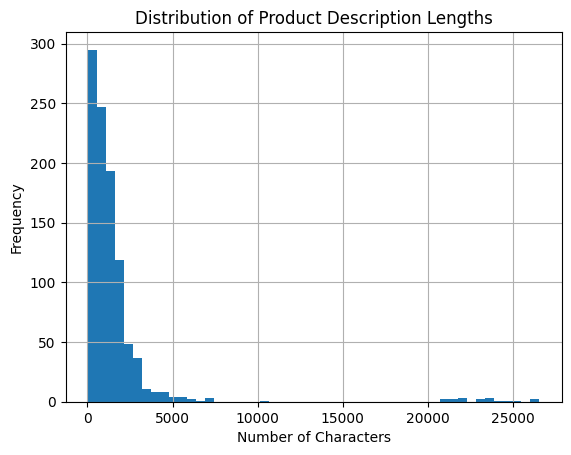

In [11]:
df["text_length"].hist(bins=50)
plt.title("Distribution of Product Description Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()
